# Traveling Salesman the Simple Hill Climb Method

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

The below function load_cities loads the text files into a 2D array ready for processing

In [2]:
def load_text_city_distances(filename):
    with open(filename, "r") as file:
        city_distances_raw = []
        city_distances = []
        cities = []
        raw_data = file.readlines()
        for line in raw_data:
            city_distances_raw = line.rstrip().split(",")
            for i in city_distances_raw:
                i.replace("\n","")
            cities.append(city_distances_raw)
    return cities

In [3]:
def calc_num_cities(cities_matrix):
    num_cities = len(cities_matrix)
    print("Loaded distance data for " + str(num_cities) + " cities")
    return num_cities

Pseudocode for the simple hill climbing algorithm is below

**Input:** initial solution s0\
**Final** solution s=[┤]
```
s= s0
While not termination criterion Do
      Generate a candidate solution st  (by exploring the neighbourhood of s)
      Evaluate candidate solution (C(st))
      if C(st)  is better than C(s)
            Assign st  to s  (s= st)
End While 
Output: Final solution s (local optima)
```

In [4]:
def create_initial_solution(nodes):
    #To always start with the first node the city list is initialised with the first city in index 0
    initial_city = [1]
    cities = list(range(2,nodes))
    random.shuffle(cities)
    city_list = initial_city + cities
    print("The initial starting list of cities is:\n" + str(city_list))
    return city_list

In [17]:
def calc_route_len(cities_matrix, route, num_cities):
    route_length = 0
    for i in range(1, num_cities - 1):
        route_length += int(cities_matrix[route[i-1]][route[i]])
    route_length +=  + int(cities_matrix[route[i-1]][0])
    print("Candidate solution length " + str(route_length))
    return route_length

In [18]:
def random_index(nodes):
    return random.randrange(1,nodes)
        

In [19]:
def generate_candidate_solution(route, num_cities):
    swap_sample = random.sample(range(1,num_cities-1),2)
    print("Swapping the" + str(swap_sample) + " positions")
    route[swap_sample[0]], route[swap_sample[1]] = route[swap_sample[1]], route[swap_sample[0]]
    print("The candidate route is " + str(route))
    return route
    

In [28]:
def tsp_simple_hill_climb(file, failing_iterations):
    cities_matrix = load_text_city_distances(file)
    num_cities = calc_num_cities(cities_matrix)
    solution = create_initial_solution(num_cities)
    solution_cost = calc_route_len(cities_matrix, solution, num_cities)
    solution_costs = []
    dud_iterations = 0
    iteration = 1
    #Not termination criterion
    while dud_iterations < failing_iterations:
        print("Candidate solution iteration: " + str(iteration))
        candidate_solution = generate_candidate_solution(solution, num_cities)
        candidate_solution_cost = calc_route_len(cities_matrix, candidate_solution, num_cities)
        if candidate_solution_cost < solution_cost:
            solution = candidate_solution
            solution_cost = candidate_solution_cost
            print("Current minimum route solution " + str(solution_cost))
            dud_iterations = 0
        else:
            dud_iterations += 1
        iteration += 1
        solution_costs.append(solution_cost)
    print("Final solution:\n" + str(solution) + "\nWith route length: " + str(solution_cost))
    print("Solution costs list:\n" + str(solution_costs))
    return solution_costs

Loaded distance data for 50 cities
The initial starting list of cities is:
[1, 30, 34, 46, 32, 8, 18, 2, 28, 11, 44, 29, 37, 42, 20, 43, 40, 19, 6, 22, 17, 36, 27, 49, 10, 13, 39, 7, 25, 14, 3, 21, 23, 41, 12, 24, 31, 5, 33, 4, 15, 35, 47, 45, 38, 26, 16, 9, 48]
Candidate solution length 278
Candidate solution iteration: 1
Swapping the[11, 13] positions
The candidate route is [1, 30, 34, 46, 32, 8, 18, 2, 28, 11, 44, 42, 37, 29, 20, 43, 40, 19, 6, 22, 17, 36, 27, 49, 10, 13, 39, 7, 25, 14, 3, 21, 23, 41, 12, 24, 31, 5, 33, 4, 15, 35, 47, 45, 38, 26, 16, 9, 48]
Candidate solution length 278
Candidate solution iteration: 2
Swapping the[39, 31] positions
The candidate route is [1, 30, 34, 46, 32, 8, 18, 2, 28, 11, 44, 42, 37, 29, 20, 43, 40, 19, 6, 22, 17, 36, 27, 49, 10, 13, 39, 7, 25, 14, 3, 4, 23, 41, 12, 24, 31, 5, 33, 21, 15, 35, 47, 45, 38, 26, 16, 9, 48]
Candidate solution length 281
Candidate solution iteration: 3
Swapping the[13, 29] positions
The candidate route is [1, 30, 34, 4

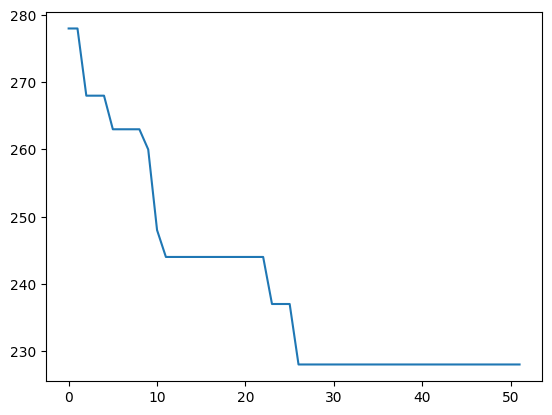

In [29]:
graph_data = tsp_simple_hill_climb("TSP_City_Distances_Matrix.txt", 25)


The pseudocode for the steepest ascent hill climb algorithm is below

**Input:** initial solution s_0\
**Final** solution s=[┤]
``` 
s= s_0
While not termination criterion Do
    Generate candidate solutions N(St) by exploring partial or complete neighbourhood
    Evaluate candidate solutions (C(N(st))
    Select a solution(s') from C(N(st)) to replace the final solution
    if C(s')  is better than C(s)
        Assign s' to s  (s= s')
    End if
End While 
Output: Final solution s (local optima)
```

In [31]:
def load_csv_city_points(filename):
    with open(filename, "r") as file:
        city_points = []
        raw_data = file.readlines()
        for line in raw_data:
            city_points.append(line.rstrip().split(","))
    return city_points

In [32]:
def plot_cities(city_points):
    x_values = []
    y_values = []
    for i in city_points:
        x_values.append(float(i[0]))
        y_values.append(float(i[1]))
    print(x_values)
    print(y_values)
    plt.scatter(np.array(x_values), np.array(y_values))

In [33]:
def calc_points_distance(point_a, point_b):
    distance = 0.0
    for i in range(len(point_a)):
        distance += (float(point_b[i]) - float(point_a[i])) ** 2
    return math.sqrt(distance)
    

In [34]:
def calc_path_length(route):
    path_length = 0
    for i in range(1,len(route)):
        path_length += calc_points_distance(route[i-1],route[i])
    return path_length

In [35]:
def generate_candidate_solutions(city_points):
    candidate_solutions = []
    for i in range(1, len(city_points)):
        changeable_city = city_points
        changeable_city[i-1], changeable_city[i] = changeable_city[i], changeable_city[i-1]
        candidate_solutions.append(changeable_city)
    return candidate_solutions

In [36]:
def calc_min_candidate_path(candidate_solutions):
    best_candidate = []
    best_path_length = 10000000
    for candidate in candidate_solutions:
        candidate_length = calc_path_length(candidate)
        if candidate_length < best_path_length:
            best_candidate = candidate
            best_path_length = candidate_length
    return best_candidate

In [37]:
def tsp_steepest_hill_climb(file, failing_iterations):
    city_points = load_csv_city_points(file)
    plot_cities(city_points)
    current_path_length = calc_path_length(city_points)
    print("Starting path length: " + str(current_path_length))
    current_path = city_points
    solution_costs = []
    failing_iteration = 0
    while failing_iteration < failing_iterations:
        candidate_solutions = generate_candidate_solutions(city_points)
        best_candidate = calc_min_candidate_path(candidate_solutions)
        best_candidate_length = calc_path_length(best_candidate)
        if best_candidate_length < current_path_length:
            current_path = best_candidate
            current_path_length = best_candidate_length
            print("Current minimum route solution " + str(current_path_length))
            failing_iteration = 0
        else:
            failing_iteration += 1
        solution_costs.append(best_candidate_length)
    print("final path:\n" + str(current_path) + "\nWith Length: " + str(current_path_length))
    return solution_costs

[2.7933, 2.6067, 2.86, 2.54, 3.1267, 3.7267, 4.4867, 5.5533, 6.3, 7.6333, 7.22, 6.6333, 7.0867, 7.4733, 7.18, 6.6867, 6.2067, 5.54, 5.1533, 4.9667, 4.8867, 4.2733, 3.6333, 2.9933]
[3.694, 4.4254, 5.0373, 6.2463, 6.4701, 6.8881, 7.4403, 7.4254, 7.3955, 6.9179, 6.3955, 5.8284, 5.1269, 4.4701, 3.709, 2.8284, 2.0522, 1.8731, 2.3358, 3.0075, 3.5448, 3.2313, 2.7537, 2.8433]
Starting path length: 18.681119060824496
Current minimum route solution 18.30438068726912
Current minimum route solution 18.13875354082491
final path:
[['7.4733', '4.4701'], ['7.18', '3.709'], ['6.6867', '2.8284'], ['6.2067', '2.0522'], ['5.54', '1.8731'], ['5.1533', '2.3358'], ['4.9667', '3.0075'], ['4.8867', '3.5448'], ['4.2733', '3.2313'], ['3.6333', '2.7537'], ['2.9933', '2.8433'], ['2.7933', '3.694'], ['2.6067', '4.4254'], ['2.86', '5.0373'], ['2.54', '6.2463'], ['3.1267', '6.4701'], ['3.7267', '6.8881'], ['4.4867', '7.4403'], ['5.5533', '7.4254'], ['6.3', '7.3955'], ['7.6333', '6.9179'], ['7.22', '6.3955'], ['6.6333

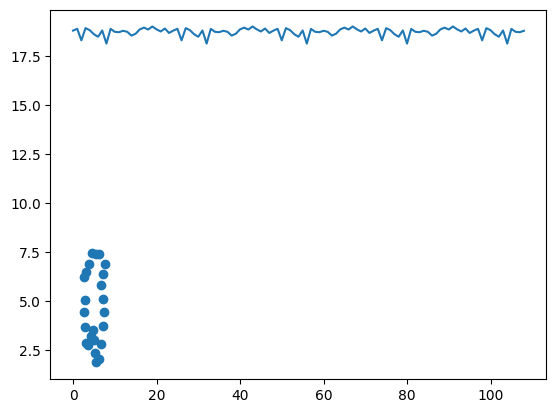

In [38]:
graph_data = tsp_steepest_hill_climb("TSP_City_Points_Matrix.csv", 100)
plt.plot(graph_data)